# Perspective Transform Demo
This piece of code is a demo of the perspective transform function.

This code involves a mouse callback function which allows you to click on the image to choose the 4 anchor points
<br> for applying the perspective transform. After the perspective transform is applied, the final warped image is displayed
<br> displayed.

The output is shown as follows:

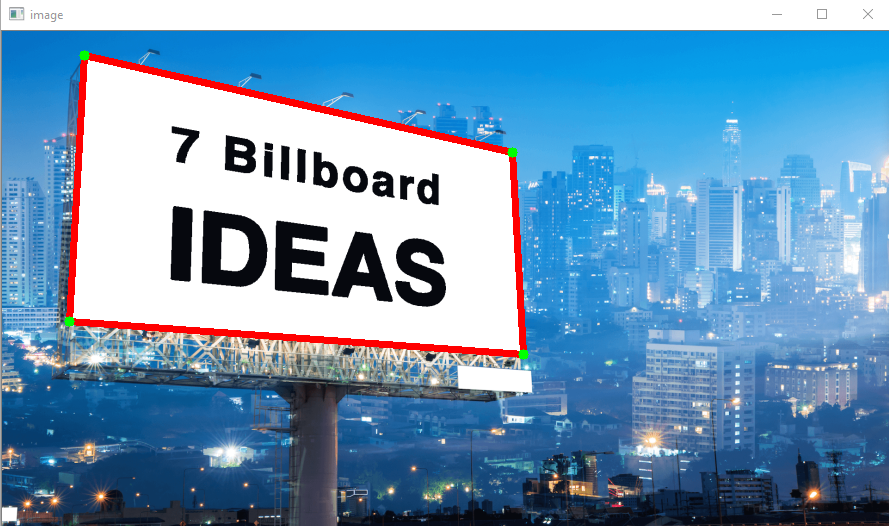
<br>**The anchor points are marked in green and are selected by clicking on the image window**

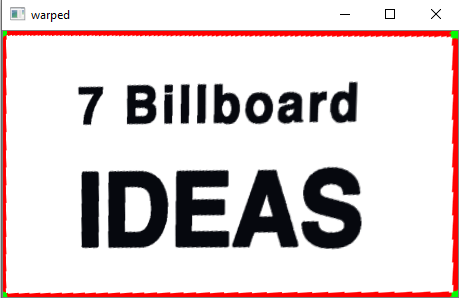
<br>**The final warped image**

In [2]:
import cv2
import numpy as np
import math

anchor_points = []

def select_anchor_points(event, x, y, flags, param):
	global anchor_points
	if event == cv2.EVENT_LBUTTONDBLCLK:
		if len(anchor_points) < 4:
			anchor_points.append((x,y))
		else:
			anchor_points.pop(0)
			anchor_points.append((x,y))

def order_points(anchor_pts):
	tl, tr, br, bl = (0,0), (0,0), (0,0), (0,0)
	if len(anchor_pts) == 4:
		anchor_pts_np = np.array(anchor_pts)
		s = anchor_pts_np.sum(axis = 1)
		tl = anchor_pts_np[np.argmin(s)]
		br = anchor_pts_np[np.argmax(s)]

		diff = np.diff(anchor_pts_np, axis = 1)
		tr = anchor_pts_np[np.argmin(diff)]
		bl = anchor_pts_np[np.argmax(diff)]
	return tuple(tl), tuple(tr), tuple(br), tuple(bl)

def draw_polygon(img, anchor_pts):
	tl, tr, br, bl = order_points(anchor_pts)
	pts = np.array([tl, tr, br, bl], np.int32)
	pts = pts.reshape((-1, 1, 2))
	img = cv2.polylines(img, [pts], True, (0, 0, 255), 5)
	for pt in anchor_points:
		cv2.line(img,pt,pt,(0,255,0),10)
	return img

def apply_perspective_transform(img, anchor_pts):
	tl, tr, br, bl = order_points(anchor_pts)

	width = max(int(math.dist(tl, tr)), int(math.dist(bl, br)))
	height = max(int(math.dist(tl, bl)), int(math.dist(tr, br)))

	dst = np.array([
		[0, 0],
		[width - 1, 0],
		[width - 1, height - 1],
		[0, height - 1]], dtype = "float32")

	arr = np.array([tl, tr, br, bl], dtype = "float32")

	M = cv2.getPerspectiveTransform(arr, dst)
	warped = cv2.warpPerspective(img, M, (width, height))
	return warped

def main():
	image_path = "test_image.png"
    
	image = cv2.imread(image_path)
	image_original = cv2.imread(image_path)
	cv2.namedWindow("image")
	cv2.setMouseCallback('image', select_anchor_points)

	while(1):
		num_anchor_points = len(anchor_points)
		if num_anchor_points < 4:
			for pt in anchor_points:
				image = cv2.line(image,pt,pt,(0,255,0),10)
		else:
			image[:, :, :] = image_original[:, :, :]
			image = draw_polygon(image, anchor_points)
			warped = apply_perspective_transform(image, anchor_points)
			cv2.imshow("warped", warped)


		cv2.imshow("image", image)
		if cv2.waitKey(20) & 0xFF == ord('q'):
			break
	cv2.destroyAllWindows()

if __name__ == "__main__":
	main()